In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import S6_Model,model_summary
from utils import ModelTrainerS6
import matplotlib.pyplot as plt

device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cpu


In [2]:
train_loader ,  test_loader  = load_data(batch_size=64)


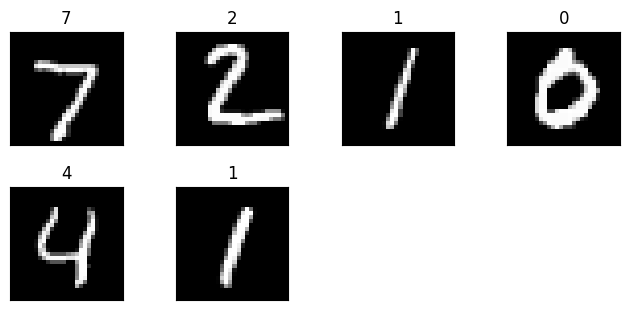

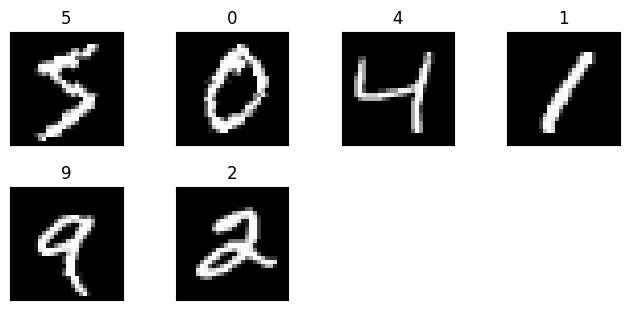

In [3]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(train_loader,6)
plot_image(test_loader,6)

In [9]:
model = S6_Model.to(device)
model_summary(model,input=(1,28,28))

AttributeError: 'torch.device' object has no attribute '_apply'